In [4]:
using Images, TestImages

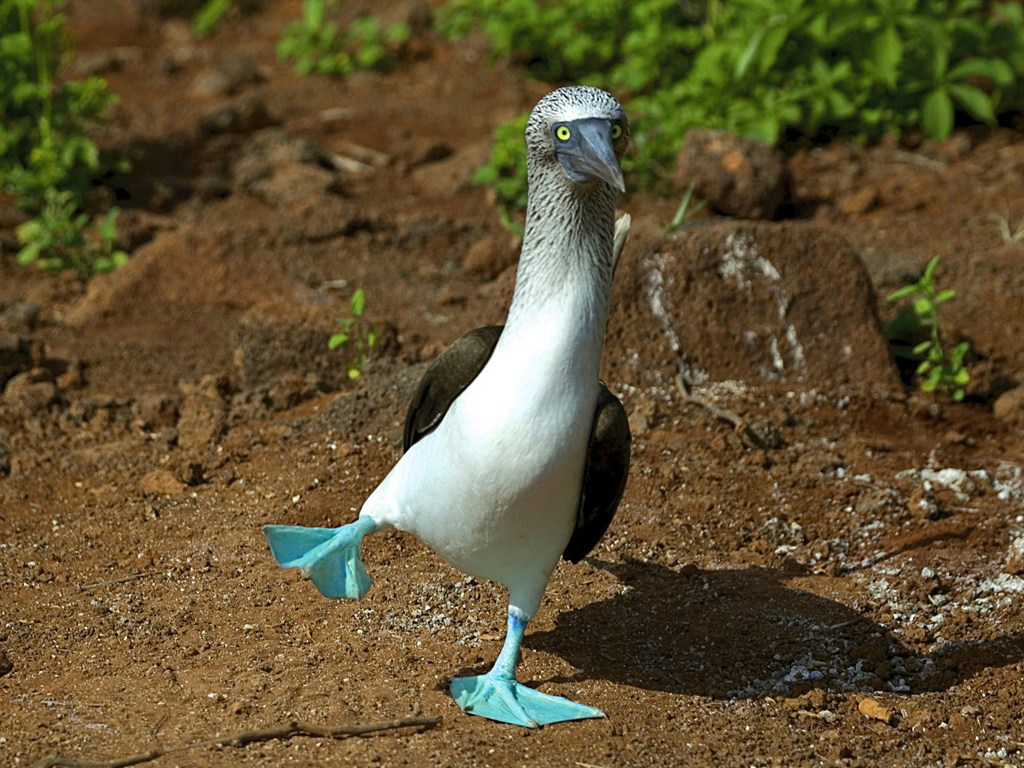

In [15]:
img = load("birdie.jpg")

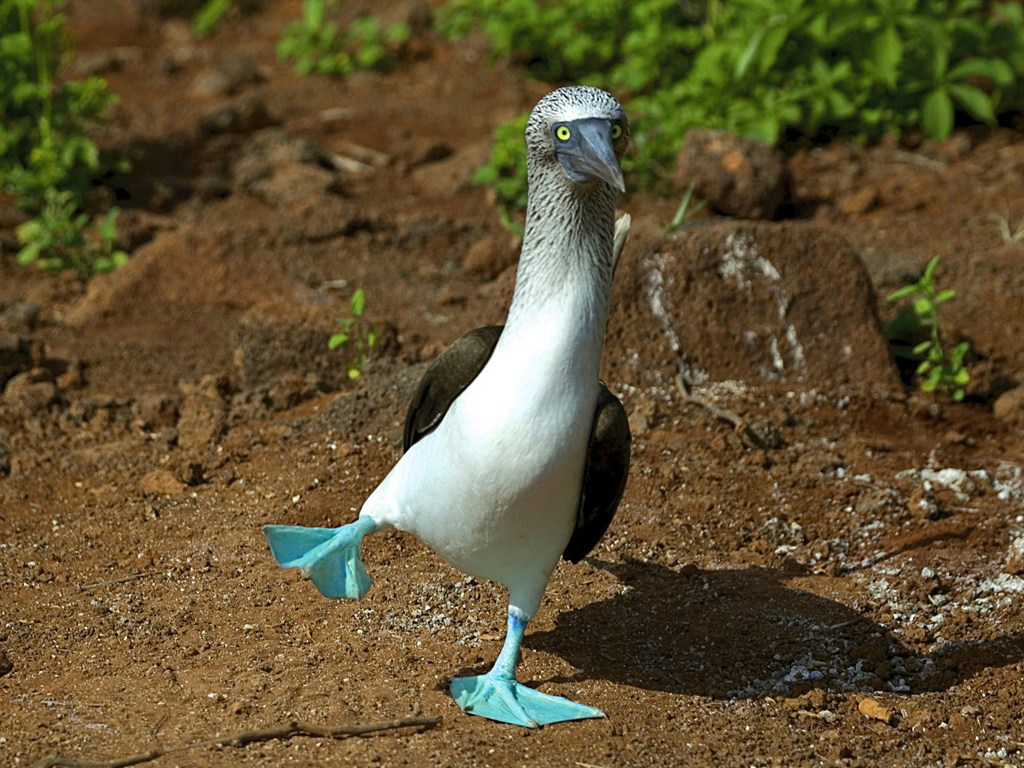

  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52


In [6]:
imghsv = HSV.(img)

In [7]:
arr_rgb = channelview(float.(img));
arr_rgb[1, 1, 1]

0.15294118f0

In [8]:
arr_hsv = channelview(float.(imghsv));
arr_hsv[1, 1, 1]

88.42105f0

In [9]:
channels = channelview(float.(imghsv))
hue_img = channels[1,:,:]
value_img = channels[3,:,:]
saturation_img = channels[2,:,:]

768×1024 Array{Float32,2}:
 0.666667  0.736842  0.786885  0.808824  …  0.839286  0.826923  0.84    
 0.769231  0.818182  0.806452  0.794521     0.779661  0.792453  0.836735
 0.865385  0.872727  0.846154  0.789474     0.716667  0.773585  0.847826
 0.87931   0.84127   0.828571  0.820513     0.7       0.745098  0.8     
 0.861538  0.816901  0.8125    0.831325     0.677966  0.745098  0.8     
 0.875     0.8125    0.793103  0.829545  …  0.645161  0.698113  0.73913 
 0.873418  0.847059  0.820225  0.846154     0.628571  0.689655  0.74    
 0.870588  0.840909  0.865169  0.877778     0.626667  0.672131  0.711538
 0.914634  0.896552  0.868132  0.87234      0.604938  0.637681  0.677966
 0.939759  0.896552  0.877778  0.891304     0.607143  0.643836  0.672131
 0.903614  0.885057  0.855556  0.877778  …  0.595506  0.644737  0.676923
 0.879518  0.829545  0.824176  0.842697     0.595745  0.64557   0.69697 
 0.835294  0.806818  0.820225  0.848837     0.610526  0.6375    0.731343
 ⋮                      

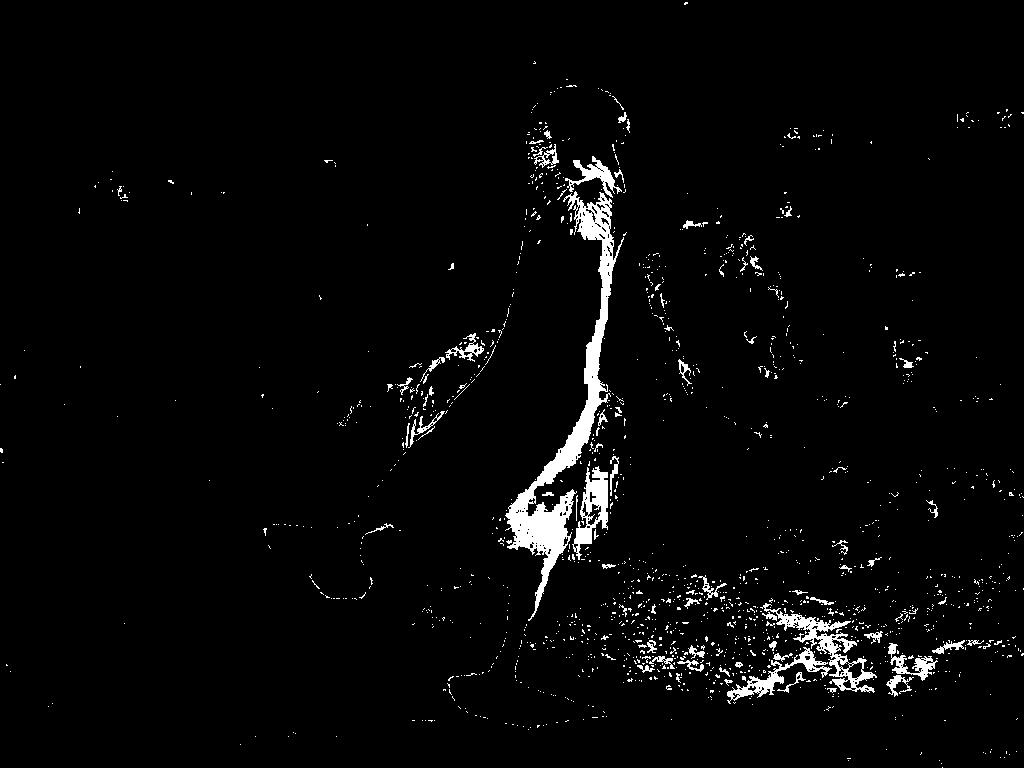

In [10]:
mask = zeros(size(hue_img))
h, s, v = 100, 90, 100
for ind in eachindex(hue_img)
    if hue_img[ind] <= h && saturation_img[ind] <= s/255 && value_img[ind] <= v/255
        mask[ind] = 1
    end
end
binary_img = colorview(Gray, mask)

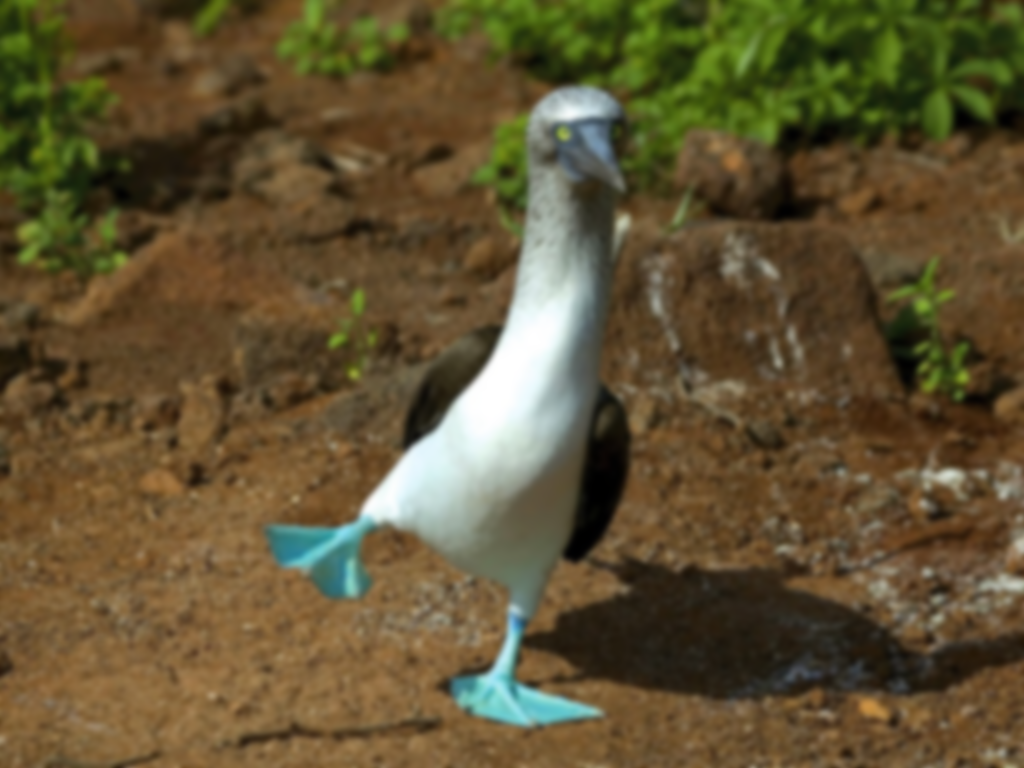

  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52


In [11]:
img2 = imfilter(img, Kernel.gaussian(3))

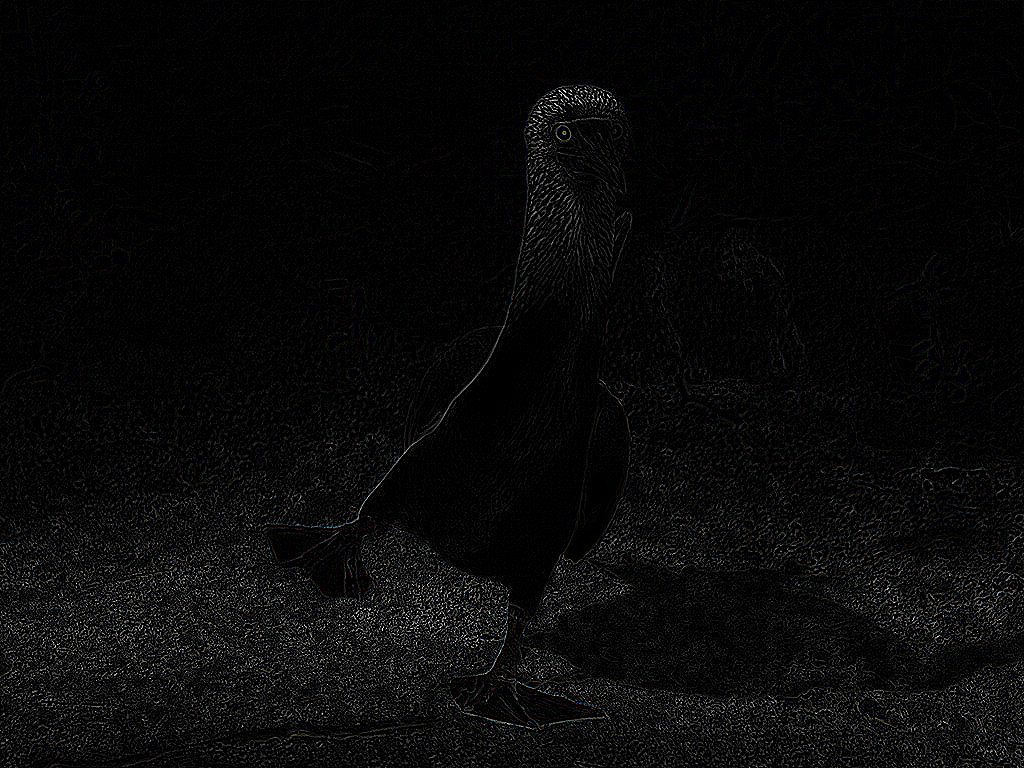

  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52
  likely near /Users/adrita/.julia/packages/IJulia/F1GUo/src/kernel.jl:52


In [12]:
img3 = imfilter(img, Kernel.Laplacian())

In [13]:
color_mask = binary_img .& img

MethodError: MethodError: no method matching &(::Gray{Float64}, ::RGBX{Normed{UInt8,8}})
Closest candidates are:
  &(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529

In [14]:
inv_mask = .! binary_img

MethodError: MethodError: no method matching !(::Gray{Float64})
Closest candidates are:
  !(!Matched::Missing) at missing.jl:100
  !(!Matched::Bool) at bool.jl:35
  !(!Matched::Function) at operators.jl:894